First things first is to import the neccessary libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
print("ran the import statements")

ran the import statements


In [23]:
rice_dataset_raw = pd.read_csv(r'c:\Users\Pakistan\Downloads\Rice_Cammeo_Osmancik.csv')

rice_dataset = rice_dataset_raw[[
    "Area", "Perimeter", "Major_Axis_Length",
    "Minor_Axis_Length", "Eccentricity",
    "Convex_Area", "Extent", "Class"
]]

rice_dataset.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.0,3810.0,3810.0,3810.0,3810.0,3810.0,3810.0
mean,12667.7,454.2,188.8,86.3,0.9,12952.5,0.7
std,1732.4,35.6,17.4,5.7,0.0,1777.0,0.1
min,7551.0,359.1,145.3,59.5,0.8,7723.0,0.5
25%,11370.5,426.1,174.4,82.7,0.9,11626.2,0.6
50%,12421.5,448.9,185.8,86.4,0.9,12706.5,0.6
75%,13950.0,483.7,203.6,90.1,0.9,14284.0,0.7
max,18913.0,548.4,239.0,107.5,0.9,19099.0,0.9


I picked this dataset from the machine learning crash course, specifically because it is easy to use, well-structured, and has clear physical features standard for shaped-based grain classification.

There are other features in the dataset but these selected few are most relevant for classification because they give a comprehensive description of each grain and are commonly used in research for rice classification.

In [45]:
print(
    f'The shortest grain is {rice_dataset.Major_Axis_Length.min():.1f}px long,'
    f'while the longest grain is {rice_dataset.Major_Axis_Length.max():.1f}px.'
)
print(
    f'The smallest rice grain has an area of {rice_dataset.Area.min()}px, while'
    f'the largest has an area of {rice_dataset.Area.max()}px.'
)

print(
    f'The largest rice grain, with a perimeter of'
    f'{rice_dataset.Perimeter.max():.1f}px, is'
    f'~{(rice_dataset.Perimeter.max() - rice_dataset.Perimeter.mean())/rice_dataset.Perimeter.std():.1f} standard'
    f'deviations ({rice_dataset.Perimeter.std():.1f}) from the mean'
    f'(({rice_dataset.Perimeter.mean():.1f}px).'
)

(print
    (
    f"This is calculated as "
    f"(max perimeter - mean perimeter) / std perimeter = "
    f"({rice_dataset.Perimeter.max():.1f} - {rice_dataset.Perimeter.mean():.1f}) / {rice_dataset.Perimeter.std():.1f} ≈ "
    f"{(rice_dataset.Perimeter.max() - rice_dataset.Perimeter.mean())/rice_dataset.Perimeter.std():.2f}"
))

The shortest grain is 145.3px long,while the longest grain is 239.0px.
The smallest rice grain has an area of 7551px, whilethe largest has an area of 18913px.
The largest rice grain, with a perimeter of548.4px, is~2.6 standarddeviations (35.6) from the mean((454.2px).
This is calculated as (max perimeter - mean perimeter) / std perimeter = (548.4 - 454.2) / 35.6 ≈ 2.65


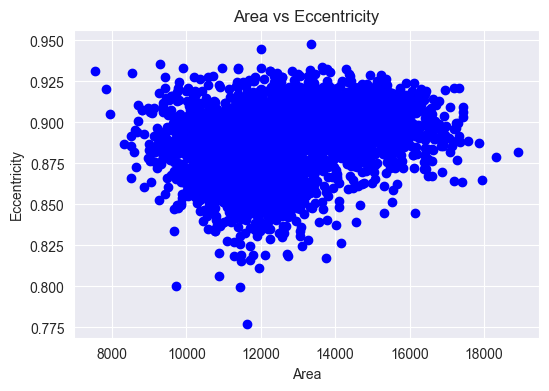

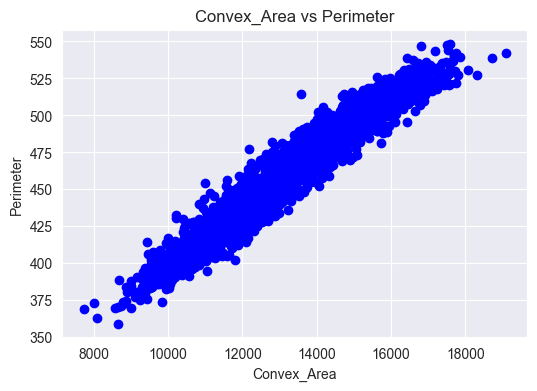

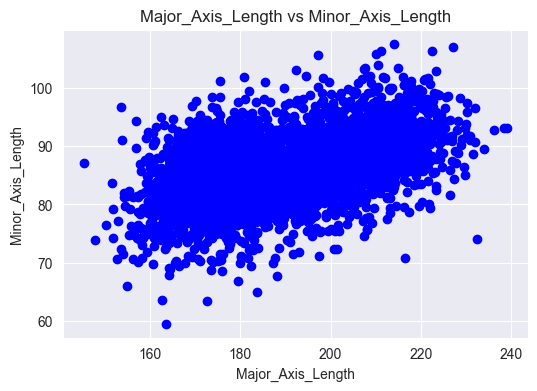

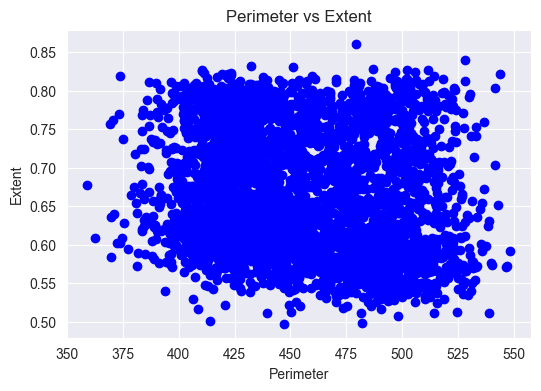

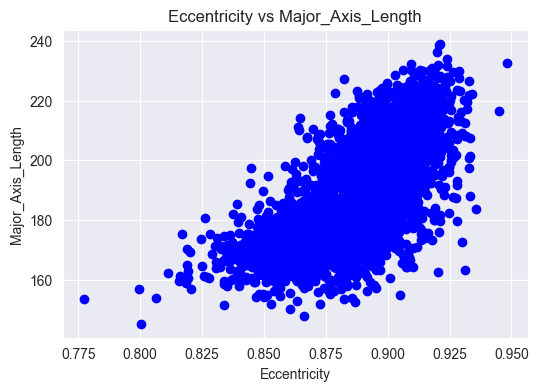

In [25]:
feature_pairs = [
    ('Area', 'Eccentricity'),
    ('Convex_Area', 'Perimeter'),
    ('Major_Axis_Length', 'Minor_Axis_Length'),
    ('Perimeter', 'Extent'),
    ('Eccentricity', 'Major_Axis_Length'),
]

for x_col, y_col in feature_pairs:
    plt.figure(figsize=(6,4))
    plt.scatter(rice_dataset[x_col], rice_dataset[y_col], c='b')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

The chart visualizes the relationship between the features with each plots uniquely vary:



Plot 1: Area vs Eccentricity are largely independent features meaning that both large and small grains tend to have similar proportions, most grains regardless of their size, have similar elongation.

Plot 2: Convex_Area vs Perimeter form a strong linear relationship, As the convex area increases, the Perimeter increases proportionally. these geatures carry similar size information.

Plot 3: Major_Axis_Length vs Minor_Axis_Length show an upward trending cloud i.e, As the major axis grows, the minor axis increase but not always the same rate. note:Grains that are longer tend to be wider, but there's variety in width for a given length.

Plot 4 : Perimeter vs Extent points are scattered indicating no strong trend, no clear relationship because these features are mostly independent.

Plot 5: Eccentricity vs Major_Axis_Length shows a uniform relationship because Eccentricity is elongation while major axis length is the length of the rice grain longest axis so basically the more it elongates the larger the length

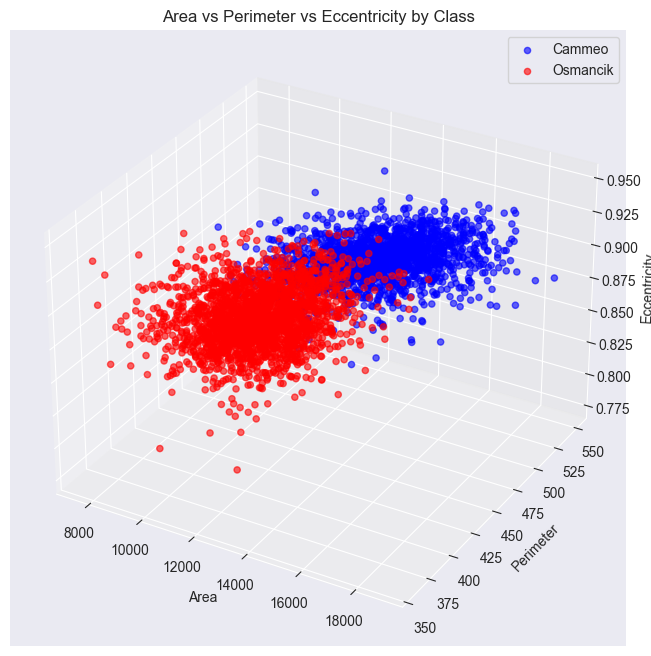

Features used for this 3D scatter plot:
X axis: Area
Y axis: Perimeter
Z axis: Eccentricity


In [27]:
from mpl_toolkits.mplot3d import Axes3D


X_axis_data = input('Enter feature name for X axis (e.g. Area): ').strip()
y_axis_data = input('Enter feature name for Y axis (e.g. Perimeter): ').strip()
z_axis_data = input('Enter feature name for Z axis (e.g. Eccentricity): ').strip()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

classes = rice_dataset['Class'].unique()
colors = ['b', 'r', 'g', 'y', 'c', 'm']

for i, class_value in enumerate(classes):
    mask = rice_dataset['Class'] == class_value
    ax.scatter(
        rice_dataset.loc[mask, X_axis_data],
        rice_dataset.loc[mask, y_axis_data],
        rice_dataset.loc[mask, z_axis_data],
        c=colors[i % len(colors)], label=class_value, alpha=0.6
    )

ax.set_xlabel(X_axis_data)
ax.set_ylabel(y_axis_data)
ax.set_zlabel(z_axis_data)
plt.legend()
plt.title(f"{X_axis_data} vs {y_axis_data} vs {z_axis_data} by Class")
plt.show()


print("Features used for this 3D scatter plot:")
print(f"X axis: {X_axis_data}")
print(f"Y axis: {y_axis_data}")
print(f"Z axis: {z_axis_data}")

The red points are Osmancik and the blue is Cammeo from the plots shows that the red(Osmancik grains have smaller areas, perimeter, and Eccentricity compared to the Cammeo with grains moving towards higher values. since the datapoints don't overlap we can see that the Areas for red is around(8000-12000+) while blue continues to 18000. Perimeter is similar,  for red is from 350 while blue is around 500, then Eccentricity also is higher for blue(Cammeo grains).

In [28]:
feature_mean = rice_dataset.mean(numeric_only=True)
feature_std = rice_dataset.std(numeric_only=True)

numerical_features = rice_dataset.select_dtypes('number').columns
normalized_dataset = (
    rice_dataset[numerical_features] - feature_mean) / feature_std

normalized_dataset['Class'] = rice_dataset['Class']

normalized_dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.5,2.0,2.3,-0.2,2.0,1.5,-1.2,Cammeo
1,1.1,1.1,1.0,0.9,0.4,1.2,-0.6,Cammeo
2,1.1,1.3,1.5,0.3,1.2,1.1,0.4,Cammeo
3,0.3,0.1,0.3,0.2,0.2,0.2,-0.3,Cammeo
4,1.2,1.5,1.3,0.5,1.0,1.3,-0.2,Cammeo


To improve the model's quality, i normalized the features in a multi-feature model, converting each raw value to it's Z-score.

Z - score is mathematically defined as : Z = (X - (X mean))/Std.

Example: if we have a raw value of let's say 75 with a mean of 60 and standard deviation of 10

Z = (75 - 60) / 10 = 1.5. so our Z-Score is 1.5

This is an aspect of feature engineering that makes all features comparable(easier for model to learn) notice that grains with higher Area, Perimeter have higher Z-score

In [49]:
keras.utils.set_random_seed(42)
normalized_dataset['Class_Bool'] = (
    normalized_dataset['Class'] == 'Cammeo'
).astype(int)
normalized_dataset.sample(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
1011,-0.1,0.1,-0.1,0.2,-0.1,-0.0,-1.0,Cammeo,1
3185,-0.1,-0.5,-0.5,0.4,-0.8,-0.2,-0.3,Osmancik,0
3698,0.1,-0.1,-0.4,0.9,-1.1,0.1,-0.2,Osmancik,0
897,0.2,0.5,0.8,-0.5,1.2,0.2,1.5,Cammeo,1
3245,-1.3,-1.3,-0.9,-1.6,0.5,-1.4,-1.1,Osmancik,0
478,0.2,0.2,0.4,-0.0,0.5,0.2,1.7,Cammeo,1
1731,-0.4,-0.8,-0.8,0.3,-1.0,-0.5,-0.4,Osmancik,0
1025,0.6,0.7,0.6,0.3,0.5,0.6,-0.5,Cammeo,1
429,1.2,1.2,1.4,0.6,1.0,1.2,1.8,Cammeo,1
1330,-0.4,-0.0,0.4,-1.3,1.4,-0.5,-0.1,Cammeo,1


After applying Z-score to normalize numeric features, we label-encode the rice species where `1` denotes Cammeo and `0` denotes Osmancik. This prepares the data for binary classification tasks.

To make my results reproducible,I set the random seed with `keras.utils.set_random_seed(42)` ensuring all random operations produce the same results every time the notebook is run.

At the end,I display 10 randomly-selected rows from the normalized and labeled dataset with a quick look at the processed data while maintaining the original DataFrame.

In [30]:
number_samples = len(normalized_dataset)
index_80th = round(number_samples * 0.8)
index_90th = index_80th + round(number_samples * 0.1)

Shufffled_dataset = normalized_dataset.sample(frac = 1, random_state=100)
train_data = Shufffled_dataset.iloc[0:index_80th]
validation_data = Shufffled_dataset.iloc[index_80th:index_90th]
test_data = Shufffled_dataset.iloc[index_90th:]
test_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
2405,-0.4,-0.7,-0.8,0.3,-1.1,-0.4,0.3,Osmancik,0
3062,-0.2,-0.0,0.2,-0.7,0.8,-0.2,1.6,Osmancik,0
1155,1.4,1.2,1.1,1.2,0.3,1.3,0.7,Cammeo,1
660,1.2,1.0,0.8,1.3,-0.0,1.2,-0.6,Cammeo,1
2451,-1.2,-1.2,-1.4,-0.3,-1.5,-1.1,0.1,Osmancik,0


Keep in mind that the number beside the Area column is actually the original row index that was randomly picked when we shuffled the dataset.

after randomizing, we split the data into train, validation, and test sets: the training set gets about 80% of the data (so the model learns from most of it), the validation set grabs the next 10% (which is used to tune or check the model as you go), and the test set takes the final 10%, which is only used for the very last evaluation—like a final exam for the model.

That way, we're sure the model isn't just memorizing everything, and we've got good separate chunks to check how well it actually works.

In [50]:
label_columns = ['Class', 'Class_Bool']
train_features = train_data.drop(columns = label_columns)
train_labels = train_data['Class_Bool'].to_numpy()
validation_features = validation_data.drop(columns = label_columns)
validation_labels = validation_data['Class_Bool'].to_numpy()
test_features = test_data.drop(columns = label_columns)
test_labels = test_data['Class_Bool'].to_numpy()

I separated the features and target labels (`Class_Bool`) for each split:
- `train_features`, `validation_features`, `test_features` contain the input features.
- `train_labels`, `validation_labels`, `test_labels` are the corresponding target values.


In [47]:
from keras import Input

input_features = [
    'Eccentricity',
    'Major_Axis_Length',
    'Extent',
]

metrics = [
    keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]


X_train = train_features[input_features].to_numpy()
y_train = train_labels
X_val = validation_features[input_features].to_numpy()
y_val = validation_labels


def create_model(input_dim, metrics, learning_rate=0.001):
    model = models.Sequential([
        Input(shape=(input_dim,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics,
    )
    return model

def train_model(model, X_train, y_train, X_val, y_val, batch_size=100, epochs=60):
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )
    return history


model = create_model(input_dim=len(input_features), metrics=metrics)
history = train_model(model, X_train, y_train, X_val, y_val, batch_size=100, epochs=60)

print('Model trained. Now plotting training/validation history.')



Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6762 - auc: 0.9185 - loss: 0.6013 - precision: 0.5734 - recall: 0.9603 - val_accuracy: 0.8005 - val_auc: 0.9376 - val_loss: 0.5551 - val_precision: 0.6996 - val_recall: 0.9645
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8310 - auc: 0.9519 - loss: 0.5046 - precision: 0.7355 - recall: 0.9473 - val_accuracy: 0.8294 - val_auc: 0.9511 - val_loss: 0.4735 - val_precision: 0.7364 - val_recall: 0.9586
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8593 - auc: 0.9605 - loss: 0.4298 - precision: 0.7767 - recall: 0.9435 - val_accuracy: 0.8556 - val_auc: 0.9558 - val_loss: 0.4117 - val_precision: 0.7740 - val_recall: 0.9527
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8901 - auc: 0.9646 - loss: 0.3704 - precision: 0.8273 - recall: 0.9404 - val_accuracy: 0.8898 - val_auc: 0.9592 - val_loss: 0.3611 - val_precision: 0.8290 - val_recall: 0.9467
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0

In my training :

60 epochs were completed and in each epoch, data was split into 31 batches.

The metrics show that the model performs well on both training and validation data

Looking at the 60th epoch metrics  below:
| Metric      | Training Value | Validation Value |
|-------------|:--------------:|:---------------:|
| Accuracy    | 0.9308         | 0.9213          |
| Loss        | 0.1791         | 0.2171          |
| Precision   | 0.9184         | 0.9112          |
| Recall      | 0.9206         | 0.9112          |
| AUC         | 0.9797         | 0.9713          |

This shows the model is not just memorizing but can also generalize to unseen data(Validation).



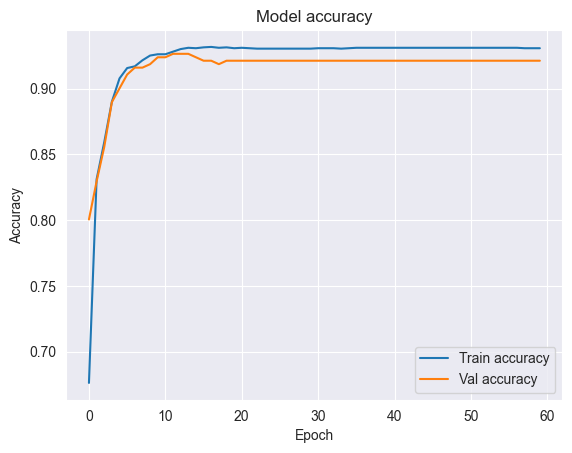

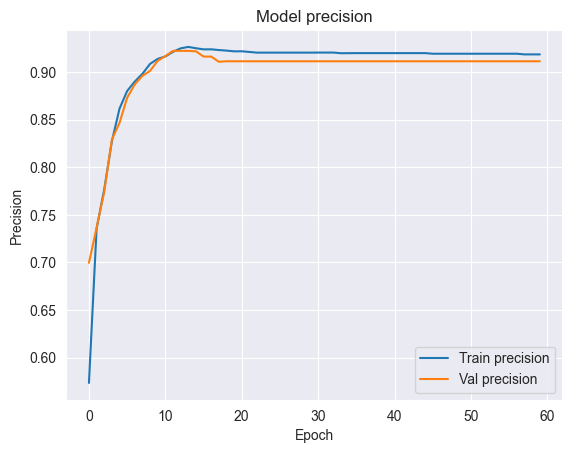

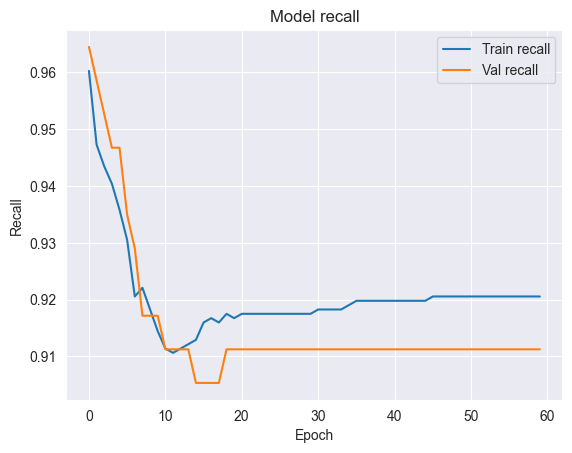

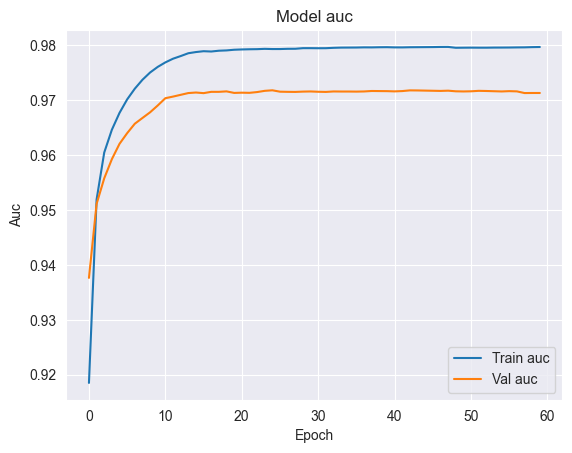

In [51]:
def plot_history(history, metrics=('accuracy','precision','recall','auc')):
    for metric in metrics:
        plt.figure()
        plt.plot(history.history[metric], label='Train '+metric)
        plt.plot(history.history['val_'+metric], label='Val '+metric)
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.title(f"Model {metric}")
        plt.legend()
        plt.show()

plot_history(history)

#### Model Training and Validation Metrics

- **Accuracy:** Both training and validation accuracy rise quickly and level off above 92%, showing the model consistently predicts correctly on both seen and unseen data.
- **Precision:** Both lines reach about 91%, meaning when the model predicts "Cammeo," it's right most of the time for both splits.
- **Recall:** After an initial drop, recall stabilizes around 91% for both; the model correctly finds most true Cammeo grains.
- **AUC:** Both curves level out above 0.97, indicating the model is excellent at distinguishing Cammeo from Osmancik.

Overall, the training and validation curves stay close together and high, which means the model is learning well and not overfitting.

Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5679 - auc: 0.7582 - loss: 0.6172 - precision: 0.4983 - recall: 0.9213 - val_accuracy: 0.6772 - val_auc: 0.8900 - val_loss: 0.5569 - val_precision: 0.5816 - val_recall: 0.9704
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7359 - auc: 0.9328 - loss: 0.5019 - precision: 0.6237 - recall: 0.9710 - val_accuracy: 0.8241 - val_auc: 0.9512 - val_loss: 0.4608 - val_precision: 0.7237 - val_recall: 0.9763
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8481 - auc: 0.9601 - loss: 0.4118 - precision: 0.7542 - recall: 0.9587 - val_accuracy: 0.8819 - val_auc: 0.9598 - val_loss: 0.3853 - val_precision: 0.8039 - val_recall: 0.9704
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8898 - auc: 0.9673 - loss: 0.3431 - precision: 0.8241 - recall: 0.9450 - val_accuracy: 0.8950 - val_auc: 0.9639 - val_loss: 0.3290 - val_precision: 0.8308 - val_recall: 0.9586
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 

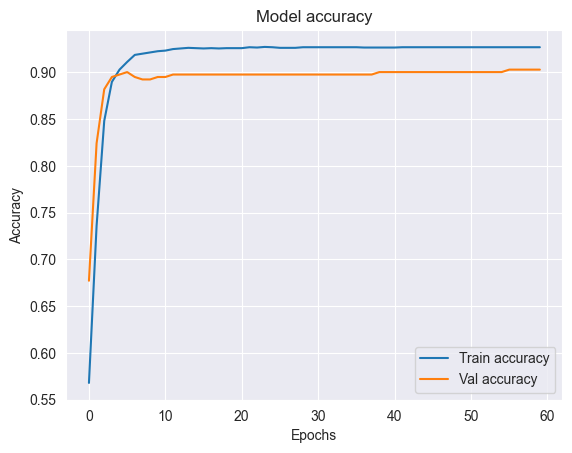

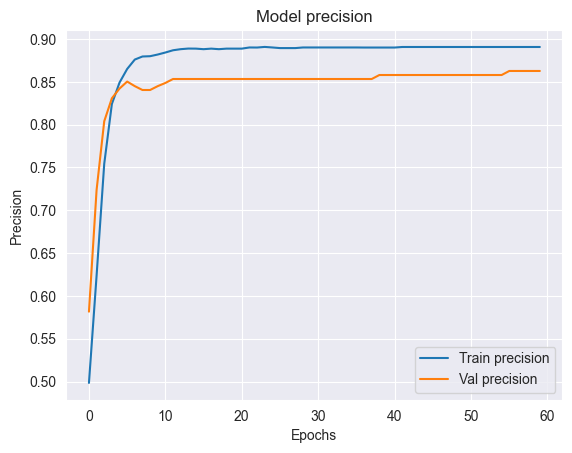

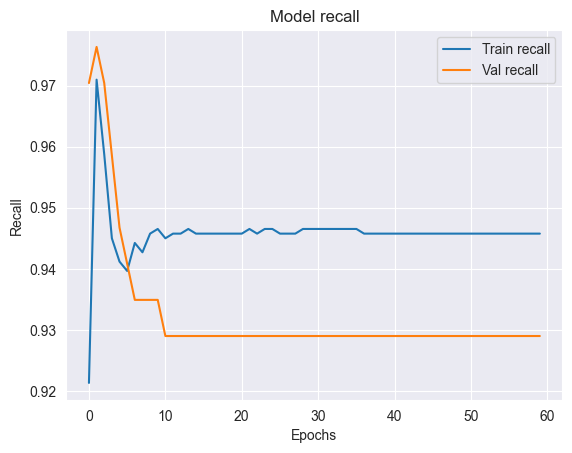

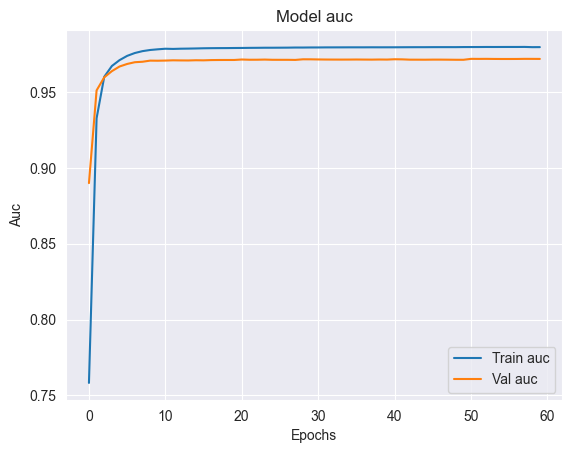

In [41]:
input_features = [
    'Eccentricity',
    'Major_Axis_Length',
    'Extent',
]

learning_rate = 0.001
number_epochs = 60
batch_size = 100
classification_threshold = 0.35

metrics = [
    keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold),
    keras.metrics.Precision(name='precision', thresholds=classification_threshold),
    keras.metrics.Recall(name='recall', thresholds=classification_threshold),
    keras.metrics.AUC(name='auc')
]

X_train = train_features[input_features].to_numpy()
X_val = validation_features[input_features].to_numpy()
y_train = train_labels
y_val = validation_labels

def create_model(input_dim, metrics, learning_rate=0.001):
    model = keras.Sequential([
        keras.Input(shape=(input_dim,)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics,
    )
    return model

model = create_model(len(input_features), metrics, learning_rate)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=number_epochs,
    batch_size=batch_size,
    verbose=1
)

import matplotlib.pyplot as plt

def plot_history(history, metrics=('accuracy','precision','recall','auc')):
    for metric in metrics:
        plt.figure()
        plt.plot(history.history[metric], label='Train '+metric)
        plt.plot(history.history['val_'+metric], label='Val '+metric)
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f"Model {metric}")
        plt.legend()
        plt.show()

plot_history(history, ['accuracy', 'precision', 'recall'])
plot_history(history, ['auc'])

I trained a small neural network using only three features: Eccentricity, Major_Axis_Length, and Extent.
The model used a learning rate of 0.001, ran for 60 epochs (batch size 100), and a 0.35 classification threshold.

Training and validation metrics (accuracy, precision, recall, AUC) improved quickly and then stabilized at high values, staying close for both data splits.

**Final metrics after 60 epochs:**
- Train: accuracy 92.68%, precision 89.06%, recall 94.58%, AUC 0.9797
- Validation: accuracy 90.29%, precision 86.26%, recall 92.90%, AUC 0.9719

**In summary:**
Even with just three features, the model achieves strong performance and generalizes well.

In [42]:
def compare_train_validation(history, metrics=('accuracy', 'precision', 'recall', 'auc')):
    print('Comparing metrics between train and validation (final epoch):')
    for metric in metrics:
        train_metric = history.history[metric][-1]
        val_metric = history.history['val_' + metric][-1]
        print('------')
        print(f'Train {metric}: {train_metric:.4f}')
        print(f'Validation {metric}: {val_metric:.4f}')

compare_train_validation(history, ['accuracy', 'precision', 'recall', 'auc'])


all_input_features = [
  'Eccentricity',
  'Major_Axis_Length',
  'Minor_Axis_Length',
  'Area',
  'Convex_Area',
  'Perimeter',
  'Extent',
]

Comparing metrics between train and validation (final epoch):
------
Train accuracy: 0.9268
Validation accuracy: 0.9029
------
Train precision: 0.8906
Validation precision: 0.8626
------
Train recall: 0.9458
Validation recall: 0.9290
------
Train auc: 0.9797
Validation auc: 0.9719


Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5702 - auc: 0.5219 - loss: 0.7550 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5564 - val_auc: 0.7494 - val_loss: 0.6553 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5705 - auc: 0.8445 - loss: 0.5833 - precision: 0.5000 - recall: 0.0023 - val_accuracy: 0.5643 - val_auc: 0.9009 - val_loss: 0.5280 - val_precision: 1.0000 - val_recall: 0.0178
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6237 - auc: 0.9375 - loss: 0.4844 - precision: 0.9309 - recall: 0.1337 - val_accuracy: 0.6929 - val_auc: 0.9417 - val_loss: 0.4681 - val_precision: 0.9643 - val_recall: 0.3195
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7812 - auc: 0.9588 - loss: 0.4359 - precision: 0.9693 - recall: 0.5065 - val_accuracy: 0.8084 - val_auc: 0.9523 - val_loss: 0.4352 - val_precision: 0.9364 - val_recall: 0.6095
Epoch 5/60
31/31 ━━━━━━

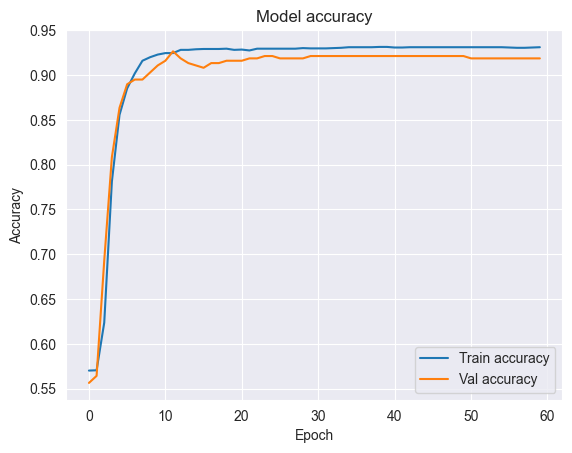

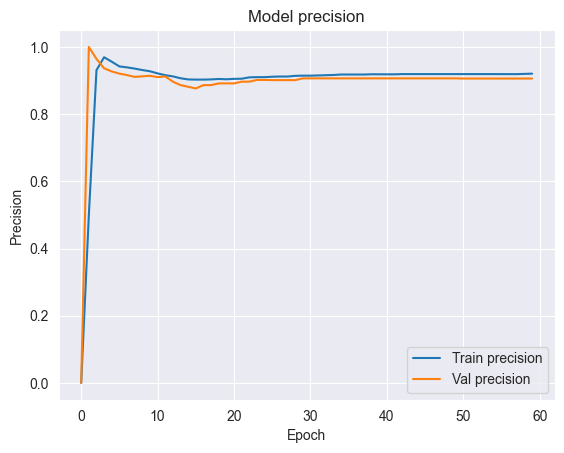

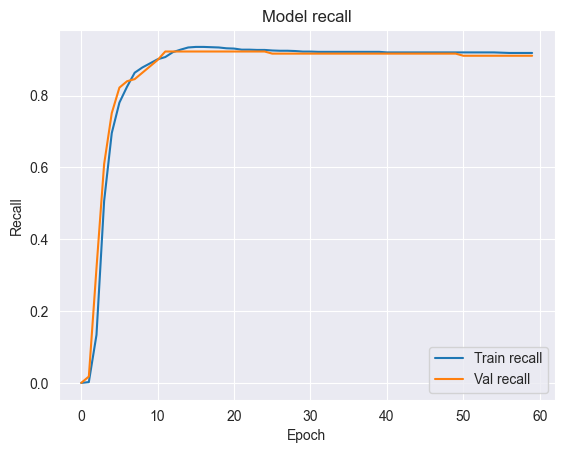

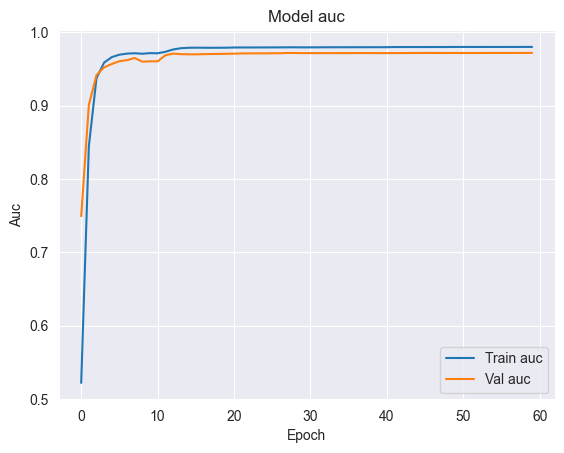

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9265 - auc: 0.9758 - loss: 0.1918 - precision: 0.9079 - recall: 0.9079 
Test loss: 0.1918
Test compile_metrics: 0.9265


In [43]:
all_input_features = [
    'Eccentricity',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Area',
    'Convex_Area',
    'Perimeter',
    'Extent',
]

from keras import layers, models

model_all_features = models.Sequential([
    layers.Input(shape=(len(all_input_features),)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_all_features.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

X_train = train_features[all_input_features].to_numpy()
y_train = train_labels

X_val = validation_features[all_input_features].to_numpy()
y_val = validation_labels

X_test = test_features[all_input_features].to_numpy()
y_test = test_labels

history = model_all_features.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    batch_size=100,
    verbose=1
)


def plot_history(history, metrics=('accuracy', 'precision', 'recall', 'auc')):
    for metric in metrics:
        plt.figure()
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history['val_' + metric], label=f'Val {metric}')
        plt.title(f'Model {metric}')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.show()

plot_history(history, ['accuracy', 'precision', 'recall', 'auc'])


test_metrics = model_all_features.evaluate(X_test, y_test, verbose=1)
metric_names = model_all_features.metrics_names

for name, value in zip(metric_names, test_metrics):
    print(f'Test {name}: {value:.4f}')

### Final Model Evaluation Summary

I trained a neural network using all seven features, with two hidden layers (16 and 8 units, ReLU activation). The model was trained over 60 epochs, with validation at each step, and finally evaluated on unseen test data (processed in 12 batches).

**Final Test Results:**
- **Accuracy:** 92.65%
- **Precision/Recall:** ~90.79%
- **AUC:** 0.9758
- **Loss:** 0.1918

Training and validation curves for all metrics remained high and close, confirming strong learning and good generalization.
The model effectively and reliably classifies rice grains, making it suitable for use.